In [1]:
# Dependencies
import json
import requests
from config import api_key
from citipy import citipy
from random import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [2]:
#Build 500 cities into dataframe

#LatMinus = [random() *-90 for x in range(50)]
#LatPlus = [random() *+90 for x in range(50)]



#LngMinus = [random() *-180 for x in range(50)]
#LngPlus = [random() *+180 for x in range(50)]

Lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
Lng = np.random.uniform(low=-180.000, high=180.000, size=1500)

LocationDf = pd.DataFrame( 
     list(zip(Lat, Lng) ), columns = ['Lat','Lng'])
LocationDf['City'] = ''
LocationDf['Country'] = ''
LocationDf['Date'] = ''
LocationDf['Max Temp'] = ''
LocationDf['Humidity'] = ''
LocationDf['Wind Speed'] = ''
LocationDf['Cloudiness'] = ''

#LocationDf



In [3]:
#citylist = citypy.WORLD_CITIES_DICT

cities = []
for index,row in LocationDf.iterrows():
    
    
    lat = row['Lat']
    lng = row['Lng']
    
    
    city = citipy.nearest_city(lat,lng).city_name
    country = citipy.nearest_city(lat,lng).country_code
    
    if city  not in cities:
        LocationDf.loc[index,'City'] = city
        LocationDf.loc[index,'Country'] = country
    else:
        LocationDf.loc[index,'City'] = ''
        LocationDf.loc[index,'Country'] = ''
    cities.append(city)

#LocationDf.groupby(['City','Country'])['City','Country'].count()
LocationDf = LocationDf[LocationDf['City']!='']
#LocationDf.dropna(subset=['City'], axis='rows', inplace=True)
LocationDf.count


<bound method DataFrame.count of             Lat         Lng                       City Country Date Max Temp  \
0    -46.582666  -60.720884                     rawson      ar                 
1     60.168073   37.760414                  lipin bor      ru                 
2    -20.711269   94.665417              palabuhanratu      id                 
3     21.478279 -128.798414                     lompoc      us                 
4    -72.027548 -142.181578                    mataura      pf                 
5    -87.494467   48.209364                port alfred      za                 
6     10.881959 -161.655835                       hilo      us                 
7     46.690999 -119.001789                      pasco      us                 
8    -81.152256   21.827145                 bredasdorp      za                 
9     -0.569016  -88.637664              san cristobal      ec                 
10    89.337672   52.358415              belushya guba      ru                 
11   -1

In [4]:
# Build partial query URL
baseurl = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'units' : "imperial",
    'appid' : api_key,
 #   'city'  : "Chennai"
}

i = 0

for index,row in LocationDf.iterrows():
    i = i+1
    city = f"{row['City']},{row['Country']}"
    
    params['q'] = city
    #params['lat'] = row['Lat']
    #params['lon'] = row['Lng']
    
    #print(params)
    
    response = requests.get(baseurl,params=params).json()
    
    try:
        # Find by nearest  city
        print(f"Processing record {i} | {city}")
        print(f"Requesting for {baseurl} with parameters {params}")
        LocationDf.loc[index,'Max Temp'] = response['main']['temp_max']
        LocationDf.loc[index,'Humidity'] = response['main']['humidity']
        LocationDf.loc[index,'Cloudiness'] = response['clouds']['all']
        LocationDf.loc[index,'Wind Speed'] = response['wind']['speed']
        LocationDf.loc[index,'Date'] = response['dt']
        
    except Exception as e:
        print("Exception is ", e)
        #print("Not found")
        # If not found by  nearest  city, find by coords
        
        del params['q']
        params['lat'] = row['Lat']
        params['lon'] = row['Lng']
        response = requests.get(baseurl,params=params).json()
        print(f"Processing record {i} | {city}")
        print(f"Requesting for {baseurl} with parameters {params}")
        LocationDf.loc[index,'Max Temp'] = response['main']['temp_max']
        LocationDf.loc[index,'Humidity'] = response['main']['humidity']
        LocationDf.loc[index,'Cloudiness'] = response['clouds']['all']
        LocationDf.loc[index,'Wind Speed'] = response['wind']['speed']
        LocationDf.loc[index,'Date'] = response['dt']
        del params['lat']
        del params['lon']
        

LocationDf.head()
LocationDf.to_excel('output.xls')


Processing record 1 | rawson,ar
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'rawson,ar'}
Processing record 2 | lipin bor,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'lipin bor,ru'}
Processing record 3 | palabuhanratu,id
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'palabuhanratu,id'}
Exception is  'main'
Processing record 3 | palabuhanratu,id
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': -20.71126922982151, 'lon': 94.66541678943128}
Processing record 4 | lompoc,us
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appi

Processing record 37 | desnogorsk,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'desnogorsk,ru'}
Processing record 38 | taolanaro,mg
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'taolanaro,mg'}
Exception is  'main'
Processing record 38 | taolanaro,mg
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': -66.08788010276103, 'lon': 54.278715867521186}
Processing record 39 | kaitangata,nz
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'kaitangata,nz'}
Processing record 40 | petropavlovka,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imper

Processing record 72 | black river,jm
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'black river,jm'}
Processing record 73 | fairbanks,us
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'fairbanks,us'}
Processing record 74 | nikolskoye,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'nikolskoye,ru'}
Processing record 75 | affery,ci
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'affery,ci'}
Processing record 76 | san quintin,mx
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'san

Processing record 106 | suchilquitongo,mx
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 17.109472973616548, 'lon': -97.08520889303787}
Processing record 107 | lebu,cl
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'lebu,cl'}
Processing record 108 | barra do corda,br
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'barra do corda,br'}
Processing record 109 | port said,eg
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'port said,eg'}
Processing record 110 | ustrzyki dolne,pl
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid':

Processing record 143 | barahona,do
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'barahona,do'}
Processing record 144 | turukhansk,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'turukhansk,ru'}
Processing record 145 | beloha,mg
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'beloha,mg'}
Processing record 146 | kruisfontein,za
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'kruisfontein,za'}
Processing record 147 | avarua,ck
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'ava

Processing record 178 | puerto palomas,mx
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'puerto palomas,mx'}
Processing record 179 | shingu,jp
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'shingu,jp'}
Processing record 180 | el rosario,hn
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'el rosario,hn'}
Processing record 181 | bluff,nz
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'bluff,nz'}
Processing record 182 | yashalta,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'yas

Processing record 210 | saint anthony,ca
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 53.14317596580145, 'lon': -56.04154628669116}
Processing record 211 | kemijarvi,fi
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'kemijarvi,fi'}
Exception is  'main'
Processing record 211 | kemijarvi,fi
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 67.26415769206508, 'lon': 28.04989085022106}
Processing record 212 | hithadhoo,mv
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'hithadhoo,mv'}
Processing record 213 | mana,gf
Requesting for http://api.openweathermap.org/data/2.5/weather with p

Processing record 243 | marawi,sd
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'marawi,sd'}
Processing record 244 | port hardy,ca
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'port hardy,ca'}
Processing record 245 | faya,td
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'faya,td'}
Exception is  'main'
Processing record 245 | faya,td
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 21.15468962470696, 'lon': 18.992577105817816}
Processing record 246 | rawah,iq
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11db

Processing record 280 | banmo,mm
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 24.440268898020804, 'lon': 97.44722111677197}
Processing record 281 | matata,nz
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'matata,nz'}
Processing record 282 | karratha,au
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'karratha,au'}
Processing record 283 | luderitz,na
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'luderitz,na'}
Processing record 284 | skjervoy,no
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a

Processing record 314 | lasa,cn
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'lasa,cn'}
Exception is  'main'
Processing record 314 | lasa,cn
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 33.20267158385437, 'lon': 89.3696245626233}
Processing record 315 | tinqueux,fr
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'tinqueux,fr'}
Processing record 316 | portsoy,gb
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'portsoy,gb'}
Processing record 317 | west wendover,us
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f

Processing record 350 | dong hoi,vn
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'dong hoi,vn'}
Processing record 351 | carnarvon,za
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'carnarvon,za'}
Processing record 352 | porto novo,cv
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'porto novo,cv'}
Processing record 353 | port hedland,au
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'port hedland,au'}
Processing record 354 | hambantota,lk
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420',

Processing record 386 | russell,nz
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'russell,nz'}
Processing record 387 | isangel,vu
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'isangel,vu'}
Processing record 388 | cabo san lucas,mx
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'cabo san lucas,mx'}
Processing record 389 | kadykchan,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'kadykchan,ru'}
Exception is  'main'
Processing record 389 | kadykchan,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc

Processing record 421 | lata,sb
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': -4.103675995029377, 'lon': 167.9297452827699}
Processing record 422 | norfolk,us
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'norfolk,us'}
Processing record 423 | nadaun,in
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'nadaun,in'}
Processing record 424 | shahreza,ir
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'shahreza,ir'}
Processing record 425 | santa fe,cu
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049

Processing record 457 | grand-santi,gf
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'grand-santi,gf'}
Processing record 458 | wasilla,us
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'wasilla,us'}
Processing record 459 | valle de allende,mx
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'valle de allende,mx'}
Processing record 460 | ust-kuyga,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'ust-kuyga,ru'}
Processing record 461 | novovorontsovka,ua
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da

Processing record 497 | belmonte,br
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'belmonte,br'}
Processing record 498 | bria,cf
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'bria,cf'}
Processing record 499 | prachuap khiri khan,th
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'prachuap khiri khan,th'}
Processing record 500 | camopi,gf
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'camopi,gf'}
Processing record 501 | muzhi,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'mu

Processing record 532 | meyungs,pw
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 10.328071902668896, 'lon': 134.1962750582626}
Processing record 533 | mabaruma,gy
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'mabaruma,gy'}
Processing record 534 | weyburn,ca
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'weyburn,ca'}
Processing record 535 | camana,pe
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'camana,pe'}
Exception is  'main'
Processing record 535 | camana,pe
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c3

Processing record 565 | tarancon,es
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'tarancon,es'}
Processing record 566 | surt,ly
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'surt,ly'}
Processing record 567 | shenjiamen,cn
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'shenjiamen,cn'}
Processing record 568 | nakatunguru,tz
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'nakatunguru,tz'}
Processing record 569 | sao joao da barra,br
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q':

Processing record 600 | kavaratti,in
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'kavaratti,in'}
Processing record 601 | broken hill,au
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'broken hill,au'}
Processing record 602 | krasnoselkup,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'q': 'krasnoselkup,ru'}
Exception is  'main'
Processing record 602 | krasnoselkup,ru
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'imperial', 'appid': 'fa9c37f11dbe7588dc7da56a049ed420', 'lat': 67.86980531990076, 'lon': 82.5019051081062}
Processing record 603 | boddam,gb
Requesting for http://api.openweathermap.org/data/2.5/weather with parameters {'units': 'i

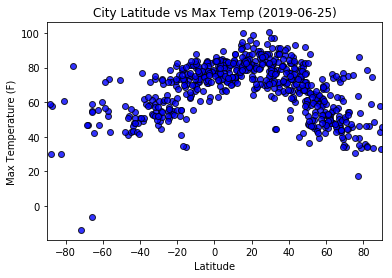

In [9]:


formatteddate = datetime.datetime.fromtimestamp(max(LocationDf['Date'])).strftime('%Y-%m-%d')
#print(formatteddate)
#plt.scatter(x=suburbanridecount,y=suburbanridemean, c='SkyBlue',s = suburbandrivercount*10,  alpha=0.8, edgecolors='black',linewidths= 1, label = 'Suburban')
plt.scatter(LocationDf['Lat'], LocationDf['Max Temp'], c='Blue',  alpha=0.8, edgecolors='black',linewidths= 1, label = 'Max Temperature (F)')
plt.title(f"City Latitude vs Max Temp ({formatteddate})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,90)



plt.savefig('Latitude.png')
plt.show()

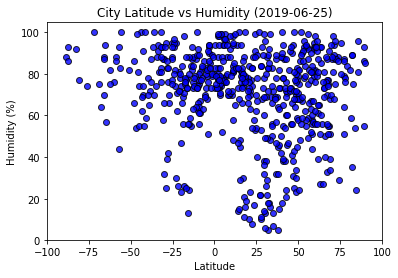

In [6]:
plt.scatter(LocationDf['Lat'], LocationDf['Humidity'], c='Blue',  alpha=0.8, edgecolors='black',linewidths= 1, label = 'Humidity')
#plt.scatter(LocationDf['Lat'], LocationDf['Humidity'])
plt.xlim(-100,100)
plt.title(f"City Latitude vs Humidity ({formatteddate})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('Humidity.png')

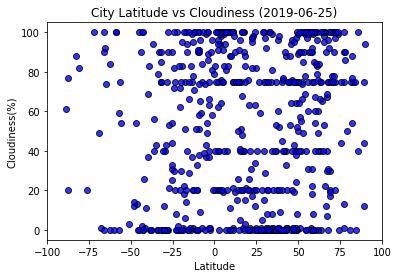

In [7]:
plt.scatter(LocationDf['Lat'], LocationDf['Cloudiness'], c='Blue',  alpha=0.8, edgecolors='black',linewidths= 1, label = 'Cloudiness')
#plt.scatter(LocationDf['Lat'] ,LocationDf['Cloudiness'])
plt.xlim(-100,100)
plt.title(f"City Latitude vs Cloudiness ({formatteddate})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.savefig('Cloudiness.png')

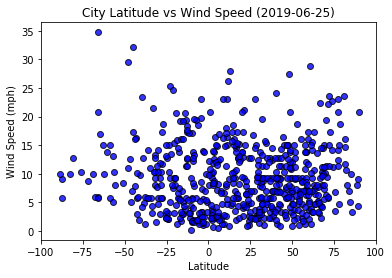

In [8]:
plt.scatter(LocationDf['Lat'], LocationDf['Wind Speed'], c='Blue',  alpha=0.8, edgecolors='black',linewidths= 1, label = 'Wind Speed')
#plt.scatter(LocationDf['Lat'], LocationDf['Wind Speed'] )
plt.xlim(-100,100)
plt.title(f"City Latitude vs Wind Speed ({formatteddate})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('WindSpeed.png')